In [1]:
import networkx as nx
from vertex import VertexCover
import time
import pandas as pd

In [2]:
MEMORY_LIMIT = 100000  # 100 KB
TIME_LIMIT = 10  # 10 seconds

In [3]:
def evaluate_graph(n, m, k):
    """Evaluate the graph using the VertexCover class.
    
    Args:
        n (int): number of nodes in the graph
        m (int): number of edges for each new node in barabasi_albert_graph
        k (int): max number of vertices in the vertex cover
        
    Returns:
        tuple: (brute_force, greedy) vertex_cover and time spent of the evaluation
    """
    
    graph = nx.barabasi_albert_graph(n, m, seed=42)
    vertex = VertexCover(MEMORY_LIMIT, TIME_LIMIT)
    vertex.set_graph(list(graph.nodes), list(graph.edges))
    start_time = time.time()
    brute_force_cover = vertex.get_cover(k, method='brute_force')
    brute_force_time_spent = round(time.time() - start_time, 5)
    start_time = time.time()
    greedy_cover = vertex.get_cover(k, method='greedy')
    greedy_time_spent = round(time.time() - start_time, 2)
    return brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent

In [4]:
# each graph is a tuple of (nodes, edges for each node, k)
graphs = {
    0: (10, 2, 6),
    1: (30, 3, 20),
    2: (60, 4, 40),
    3: (90, 5, 60),
}

In [5]:
def print_results(brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent):
    print('\nResults:')
    print(f'Brute force cover: {brute_force_cover}')
    print(f'Brute force time spent: {brute_force_time_spent}')
    print(f'Greedy cover: {greedy_cover}')
    print(f'Greedy time spent: {greedy_time_spent}')

In [6]:
data = list()

In [7]:
n, m, k = graphs[0]
brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent = evaluate_graph(n, m, k)
data.append([n, m, k, brute_force_time_spent, greedy_time_spent])
print_results(brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent)

Running brute_force strategy with k=6...
Running greedy strategy with k=6...

Results:
Brute force cover: [0, 1, 3, 4, 6]
Brute force time spent: 0.00237
Greedy cover: [0, 1, 4, 3, 6]
Greedy time spent: 0.0


In [8]:
n, m, k = graphs[1]
brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent = evaluate_graph(n, m, k)
data.append([n, m, k, brute_force_time_spent, greedy_time_spent])
print_results(brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent)

Running brute_force strategy with k=20...
Exceeded time limit! Time Limit: 10 seconds
Running greedy strategy with k=20...

Results:
Brute force cover: None
Brute force time spent: 10.04497
Greedy cover: [5, 4, 0, 6, 7, 3, 10, 12, 14, 22, 26, 1, 16, 20]
Greedy time spent: 0.0


In [9]:
n, m, k = graphs[2]
brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent = evaluate_graph(n, m, k)
data.append([n, m, k, brute_force_time_spent, greedy_time_spent])
print_results(brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent)

Running brute_force strategy with k=40...
Exceeded time limit! Time Limit: 10 seconds
Running greedy strategy with k=40...

Results:
Brute force cover: None
Brute force time spent: 10.02357
Greedy cover: [0, 7, 8, 6, 5, 9, 18, 3, 25, 17, 21, 14, 38, 19, 10, 16, 23, 33, 29, 37, 45, 50, 12, 20, 24, 32, 34, 41, 11, 15, 26, 27, 31, 36, 40]
Greedy time spent: 0.01


In [10]:
n, m, k = graphs[3]
brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent = evaluate_graph(n, m, k)
data.append([n, m, k, brute_force_time_spent, greedy_time_spent])
print_results(brute_force_cover, brute_force_time_spent, greedy_cover, greedy_time_spent)

Running brute_force strategy with k=60...
Exceeded time limit! Time Limit: 10 seconds
Running greedy strategy with k=60...

Results:
Brute force cover: None
Brute force time spent: 10.02369
Greedy cover: [0, 7, 9, 8, 6, 10, 15, 11, 16, 18, 19, 3, 26, 12, 17, 25, 20, 30, 5, 45, 51, 69, 1, 21, 29, 13, 27, 32, 82, 4, 33, 48, 49, 61, 62, 78, 24, 31, 35, 40, 41, 44, 53, 54, 56, 72, 14, 28, 36, 38, 42, 58, 73, 74, 75, 76]
Greedy time spent: 0.04


In [11]:
df = pd.DataFrame(
    data,
    columns=['n', 'm', 'k', 'brute_force_time_spent', 'greedy_time_spent'],
)
df

,n,m,k,brute_force_time_spent,greedy_time_spent
0,10,2,6,0.00237,0.00
1,30,3,20,10.04497,0.00
2,60,4,40,10.02357,0.01
3,90,5,60,10.02369,0.04


<AxesSubplot: xlabel='n'>

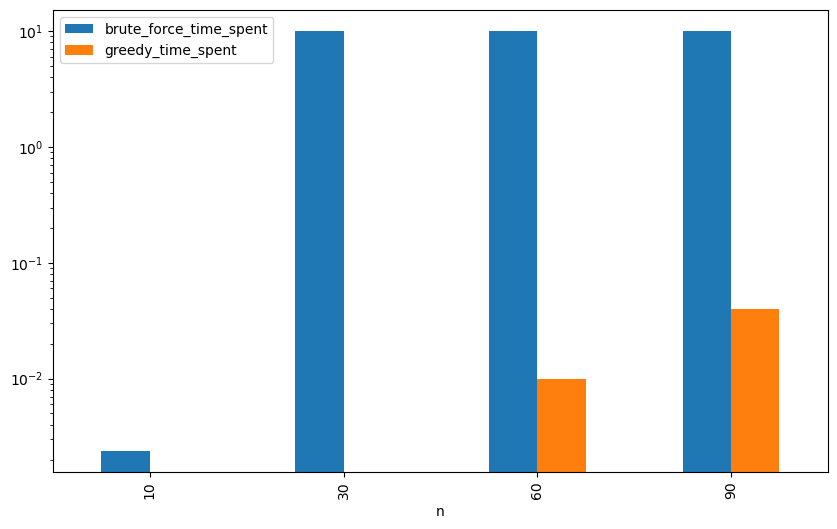

In [18]:
df.plot(
    x='n', 
    y=['brute_force_time_spent', 'greedy_time_spent'], 
    kind='bar', 
    logy=True,
    figsize=(10, 6),
)